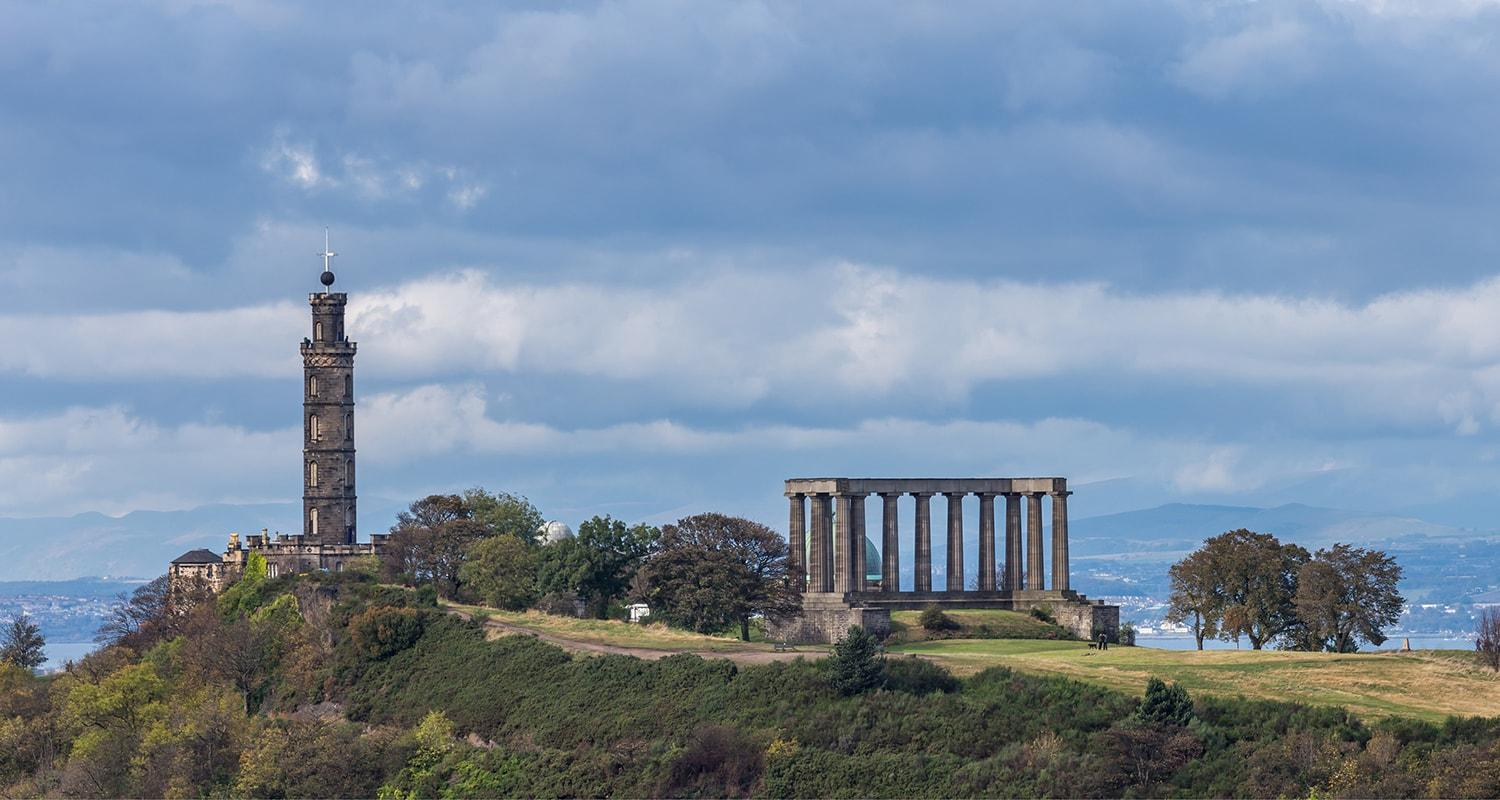

In [1]:
import numpy as np
from PIL import Image as image
from IPython.display import Image, display
from io import BytesIO

img = np.array(image.open('monument.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

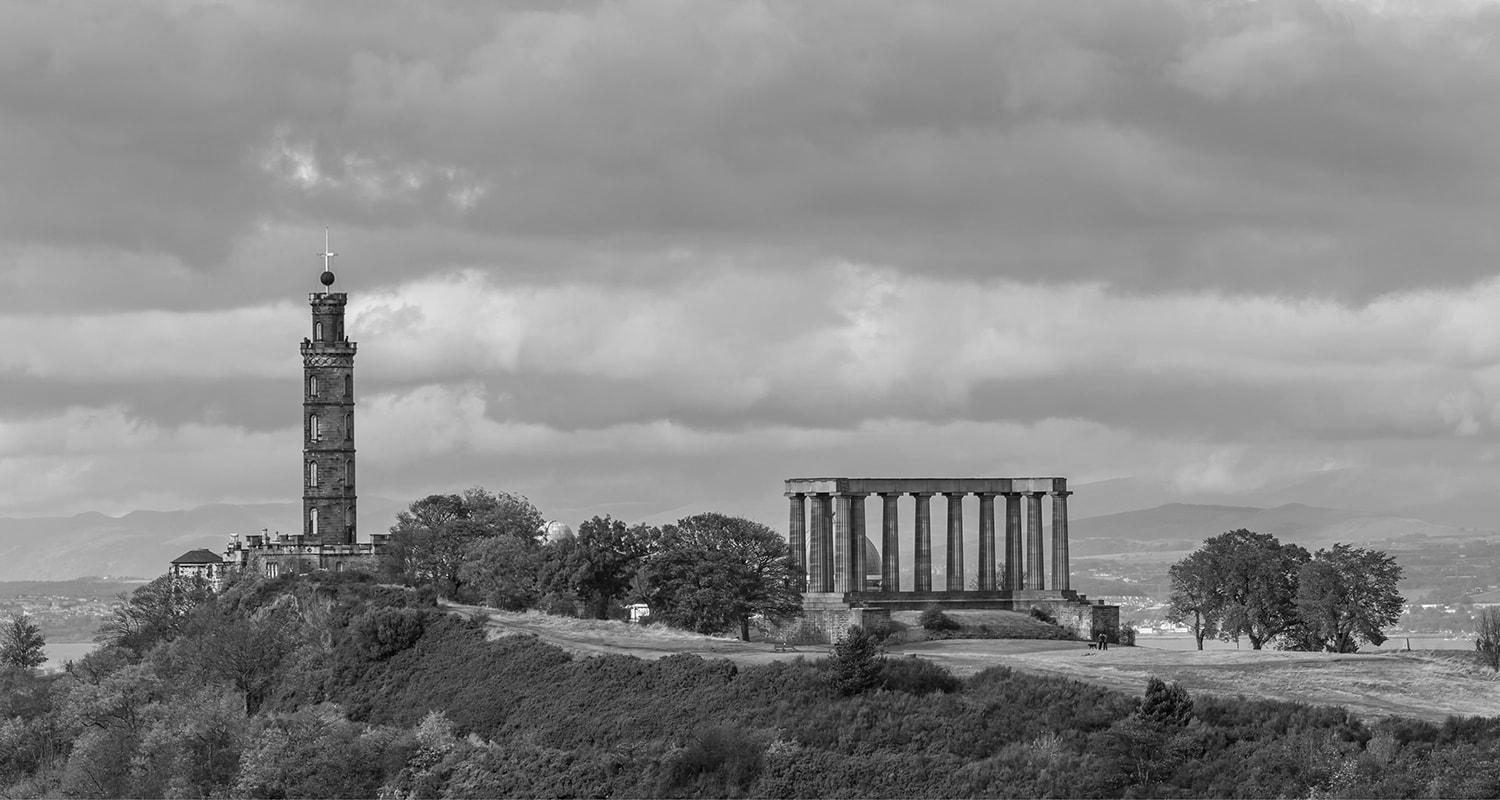

In [2]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

f = BytesIO()
image.fromarray(gray.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

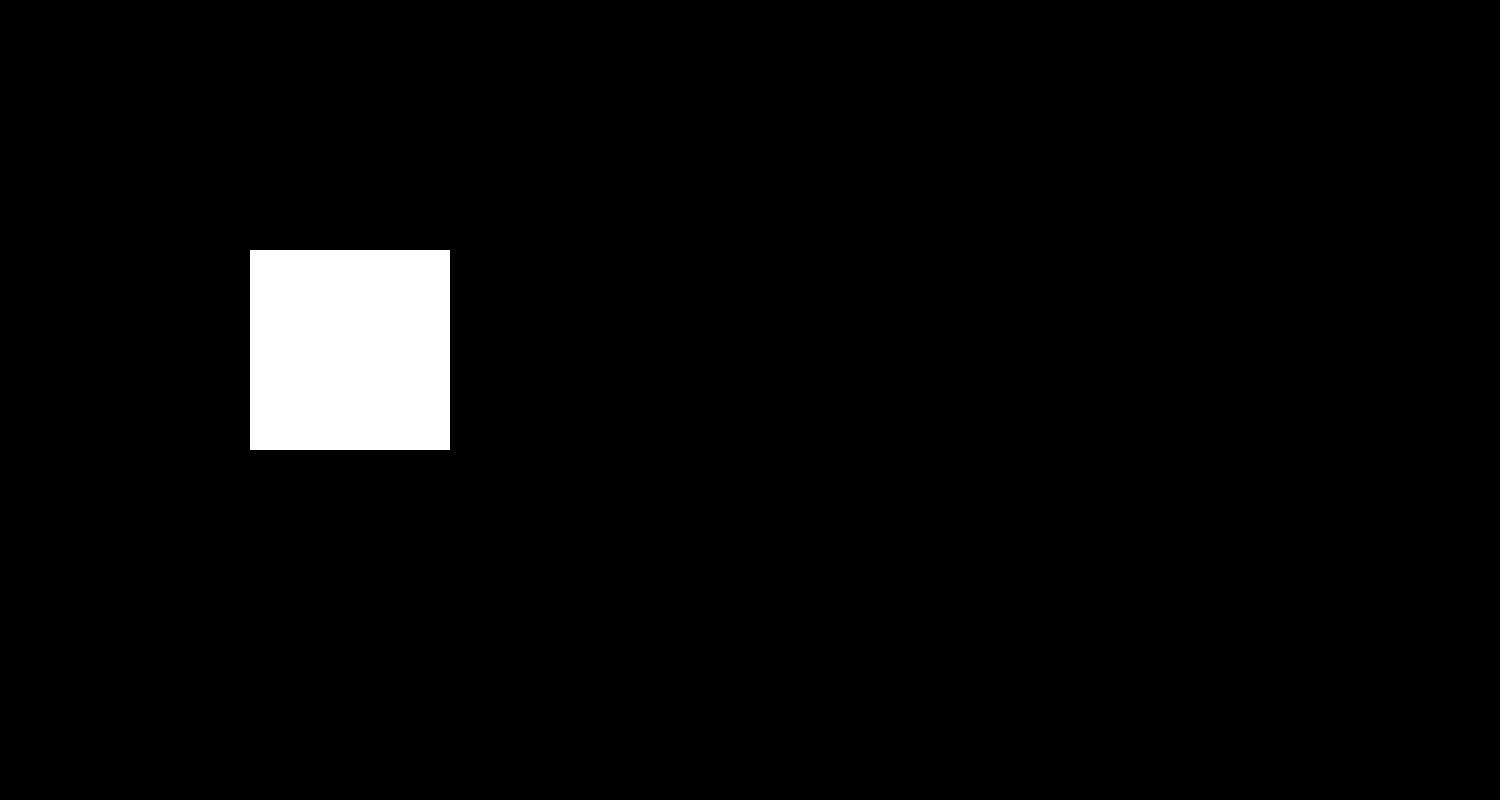

In [3]:
### AND Operation ###

andMask = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)
andMask[250:450, 250:450] = 255
f = BytesIO()
image.fromarray(andMask.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

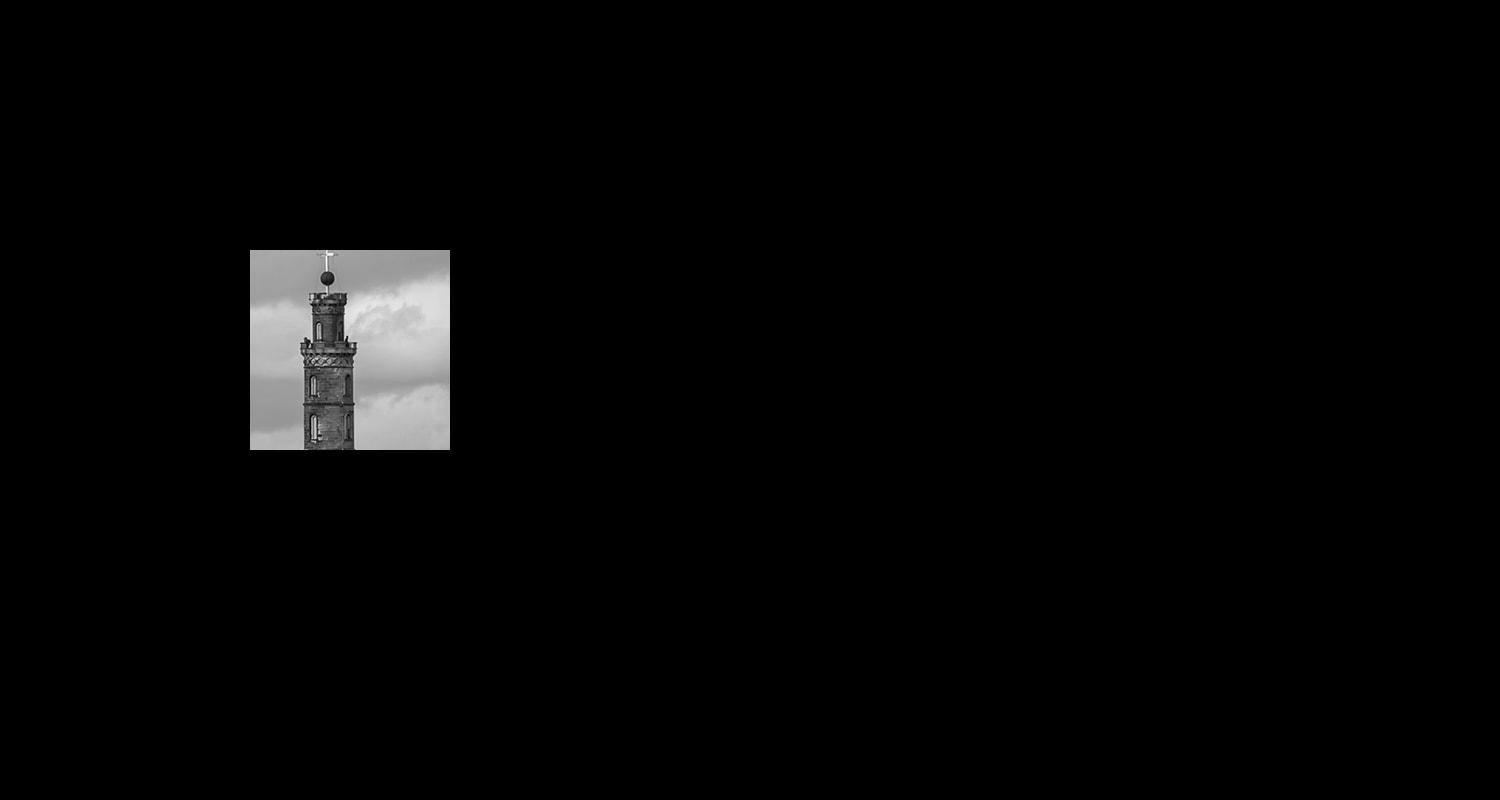

In [4]:
andImage = np.zeros((gray.shape[0], gray.shape[1]))

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        andImage[i][j] = int(gray[i][j]) & andMask[i][j]
f = BytesIO()
image.fromarray(andImage.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

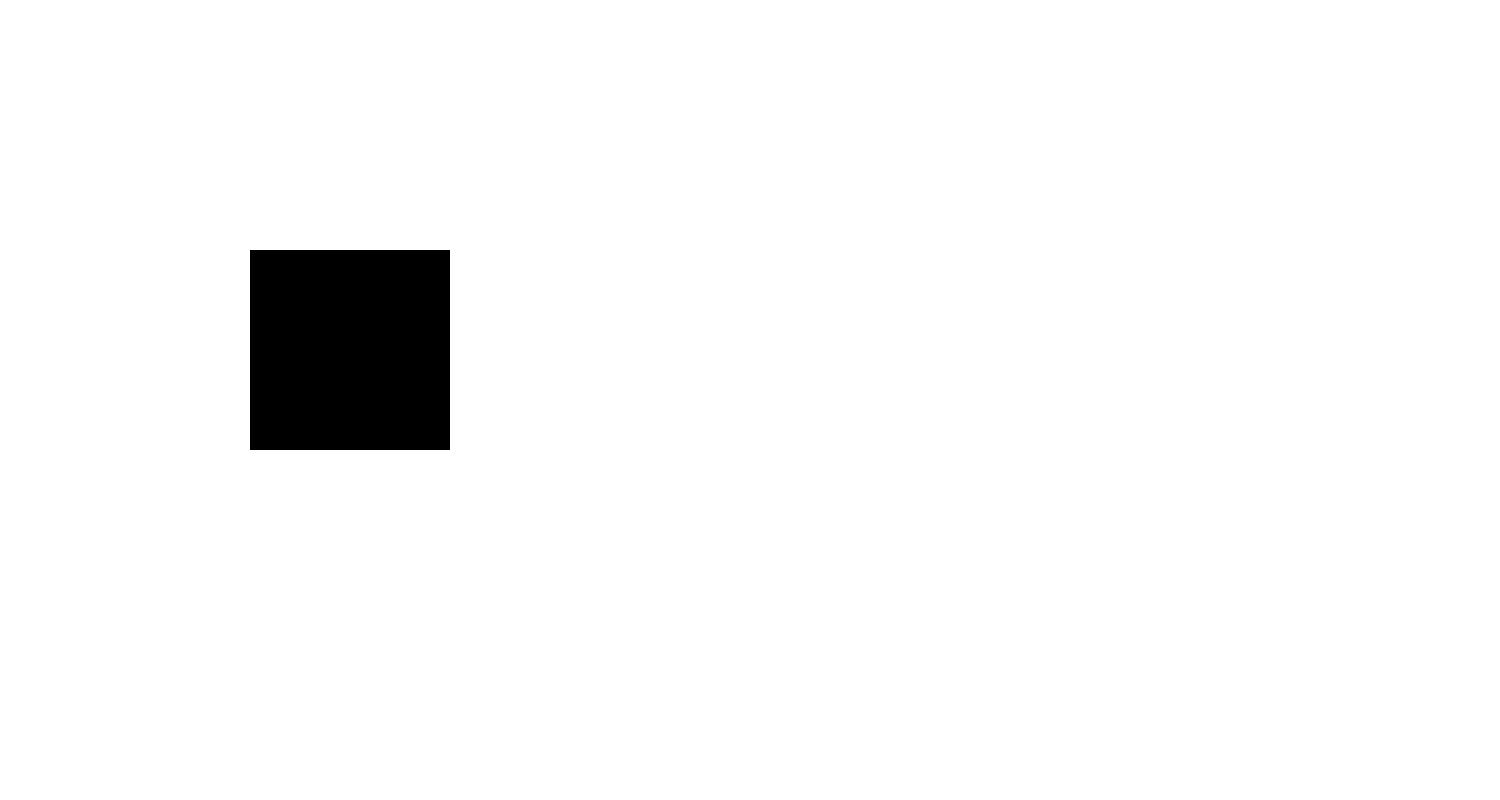

In [5]:
### OR Operation ###

orMask = np.ones((gray.shape[0], gray.shape[1]), dtype=np.int32) * 255
orMask[250:450, 250:450] = 0
f = BytesIO()
image.fromarray(orMask.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

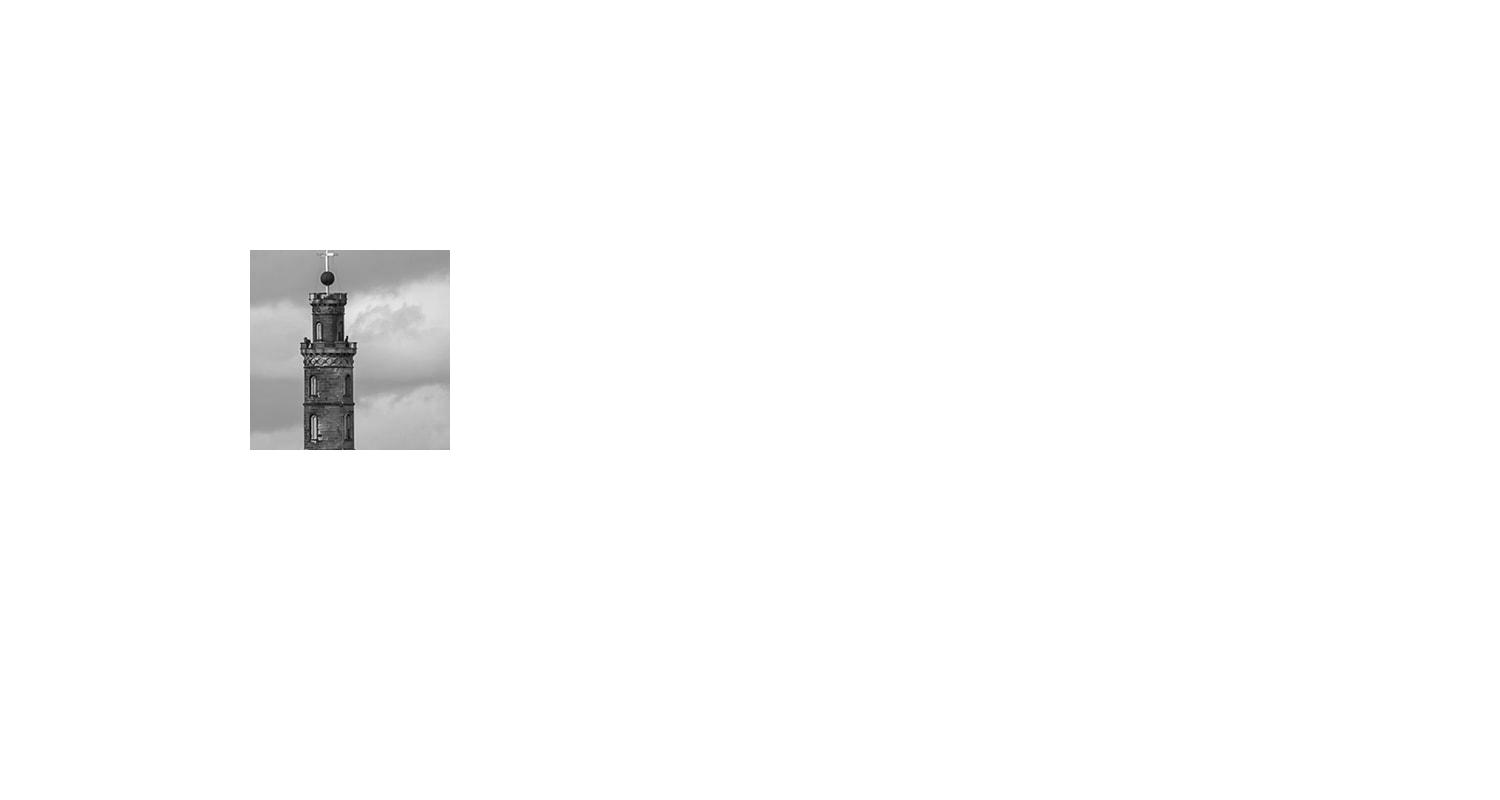

In [6]:
orImage = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        orImage[i][j] = int(gray[i][j]) | orMask[i][j]
f = BytesIO()
image.fromarray(orImage.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

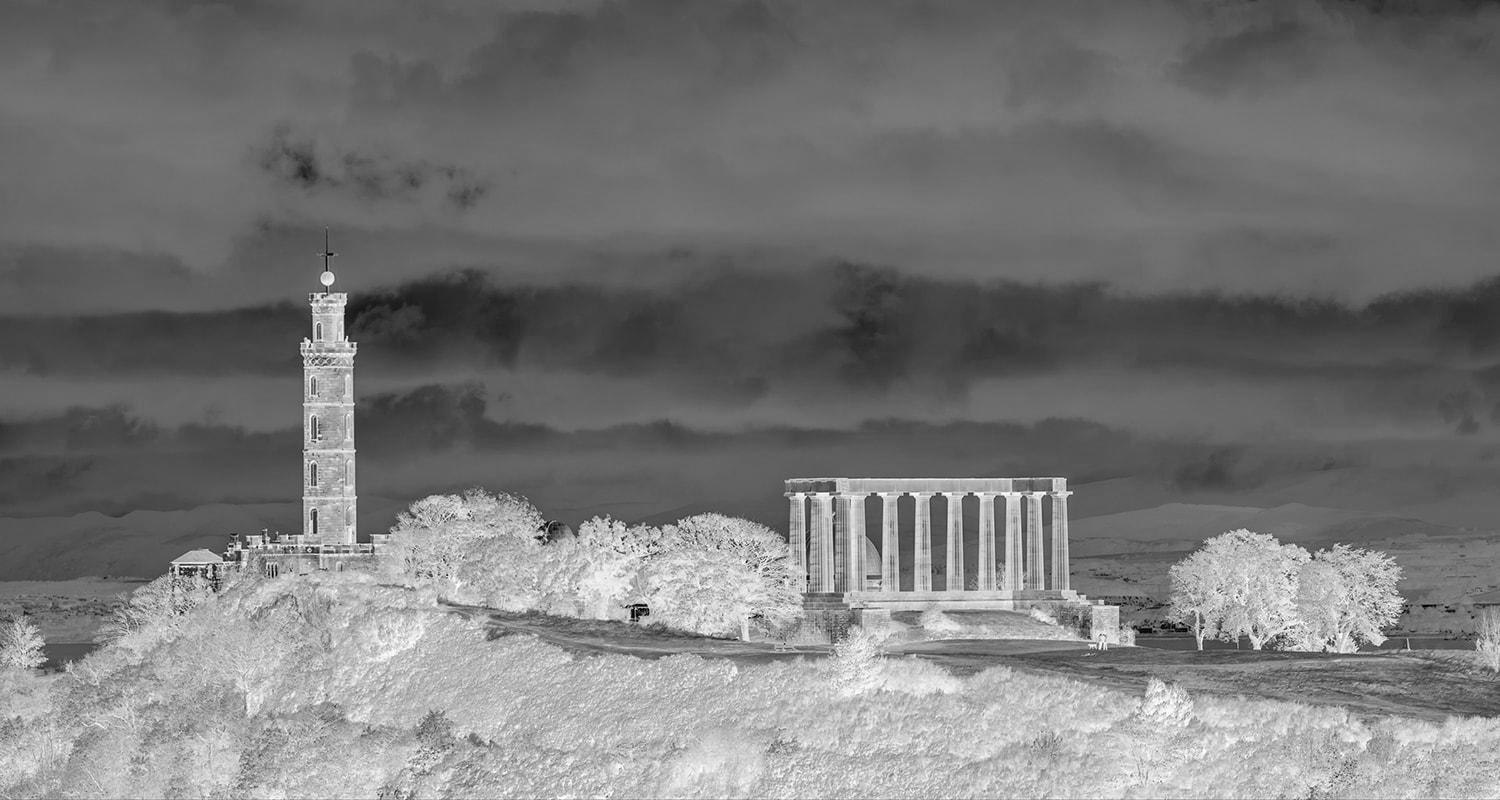

In [7]:
### Not Operation ###

notImage = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        notImage[i][j] = ~int(gray[i][j])

f = BytesIO()
image.fromarray(notImage.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))      